<a href="https://colab.research.google.com/github/Matinnorouzi2023/Machin-learning/blob/main/wind_turbine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Data preparation

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [14]:
df= pd.read_csv('DT_WT.csv')
print(df.shape)
df.head()
#df.describe()

(50530, 5)


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df=df[df['LV ActivePower (kW)']>0]

df=df.dropna()
df.shape
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [17]:
from sklearn import preprocessing

scaler=preprocessing.StandardScaler()

data_process=df[['Wind Speed (m/s)','Wind Direction (°)','Theoretical_Power_Curve (KWh)']]
data_process=scaler.fit_transform(data_process)

data_process[:5]

array([[-0.91649717,  1.67442896, -1.08191076],
       [-0.82087605,  1.77464493, -1.00261772],
       [-0.94175173,  1.82012324, -1.10137558],
       [-0.82418663,  1.8049776 , -1.00551878],
       [-0.84584616,  1.74025721, -1.02421485]])

# 2- Data visualization

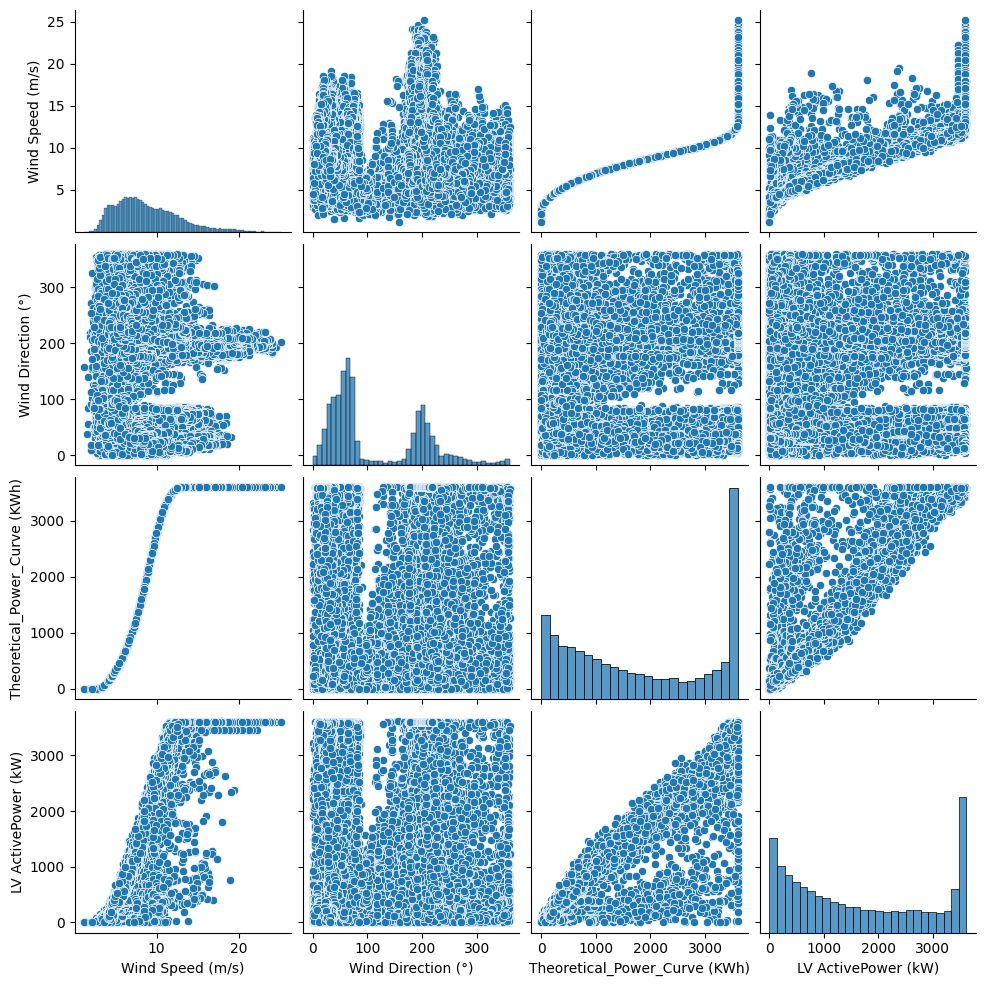

In [18]:
sns_plot = sns.pairplot(data = df, vars=['Wind Speed (m/s)','Wind Direction (°)','Theoretical_Power_Curve (KWh)', 'LV ActivePower (kW)'])
sns_plot.figure.savefig('output.png')

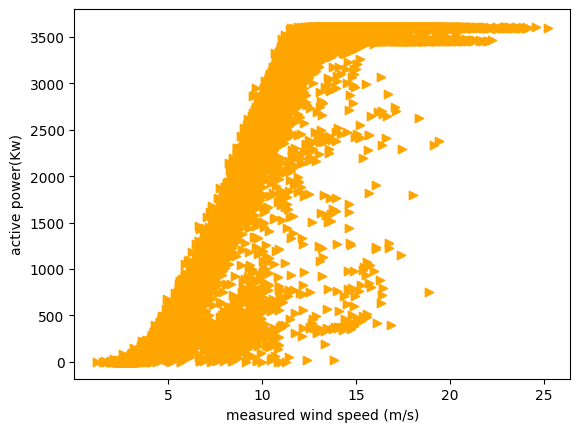

In [19]:
plt.scatter(df['Wind Speed (m/s)'],df['LV ActivePower (kW)'], color='orange', marker='>')
plt.xlabel('measured wind speed (m/s)')
plt.ylabel('active power(Kw)')
plt.savefig('scatterplot1.png')
plt.show()

# 3- Multiple Linear Regression

In [20]:
from sklearn.model_selection import train_test_split

x = data_process
y = df['LV ActivePower (kW)']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.85, random_state= 1)

print('train', xtrain.shape, ytrain.shape)
print('test', xtest.shape, ytest.shape)

train (33738, 3) (33738,)
test (5954, 3) (5954,)


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)

print(model.coef_)
print(model.intercept_)

print('formula:  Active power=', model.coef_[0],'* ws+',model.coef_[1],'* wd+',model.coef_[2],'* tpc+',model.intercept_)

[ 194.78357721   25.75551172 1050.65259977]
1664.3350261116893
formula:  Active power= 194.78357721056665 * ws+ 25.75551171950019 * wd+ 1050.6525997711215 * tpc+ 1664.3350261116893


# 4- Model Evaluation

In [22]:
ypred = model.predict(xtest)
ypred.shape

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print('mean_squared_error:', mse)
print('mean_absolute_error:', mae)
print('r2_score:', r2)

mean_squared_error: 70518.01961163216
mean_absolute_error: 138.67748767498662
r2_score: 0.9555928660513285


In [23]:
sample = {'Wind Speed (m/s)': [10.45, 6.85, 2.25],'Wind Direction (°)': [225.12, 126.14, 165],'Theoretical_Power_Curve (KWh)': [3400, 1564, 1200]}

sdf = pd.DataFrame(sample)
sample_normal = scaler.fit_transform(sdf)

In [24]:
y_sample = model.predict(sample_normal)
y_sample

array([3394.22155779, 1119.19812604,  479.58539451])